## Observations and Insights 

1) From the bar graph "Mesurements Taken on Each Drug ",
we observed that maximum number of mice were treated with Capomulin drug (230) 
and least number of mice(148) were treated with Propriva drug .

2) By removing duplicates the total number of mice is 248. 
The total count of mice by gender also showed that there were 123 female mice and 125 male mice

3) Average Tumor Volume Vs Mouse Weight graph shows that with weight the tumor volume also increases in linear pattern

4) Average Tumor Volume Vs Mouse Weight also shows that there is correlation between Average volume of Tumor vs weight of mice(The correlation between mouse weight and average tumor volume is 0.84)

In [1]:
# Dependencies and Setup
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [2]:
# Checking the number of mice.
mice_count = combined_mouse_data["Mouse ID"].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_id = combined_mouse_data[combined_mouse_data.duplicated(['Mouse ID','Timepoint'])]
duplicate_mice_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_data[combined_mouse_data['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#new_clean_df = combined_mouse_data.drop_duplicates('Mouse ID')
new_clean_df = combined_mouse_data[combined_mouse_data['Mouse ID']!='g989']
new_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_clean_df["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_data = new_clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

pd.DataFrame({
    "Mean":grouped_data.mean(), "Median":grouped_data.median(), "Variance":grouped_data.var(),
    "Standard_Deviation":grouped_data.std(), "SEM":grouped_data.sem()
})


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

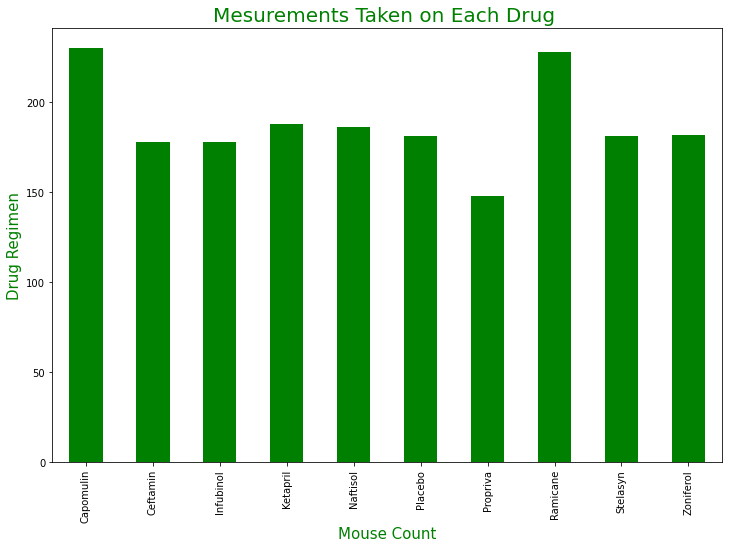

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_df = new_clean_df.groupby(['Drug Regimen']).count()['Mouse ID']

drug_df.plot.bar(figsize=(12,8), facecolor='g')

plt.title("Mesurements Taken on Each Drug ",fontsize=20, color="g")
plt.ylabel("Drug Regimen",fontsize=15, color="g" )
plt.xlabel("Mouse Count",fontsize=15, color="g")

drug_df

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
mouse_counts = (new_clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()
mouse_counts



[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

Text(0.5, 0, 'Drug Regimen')

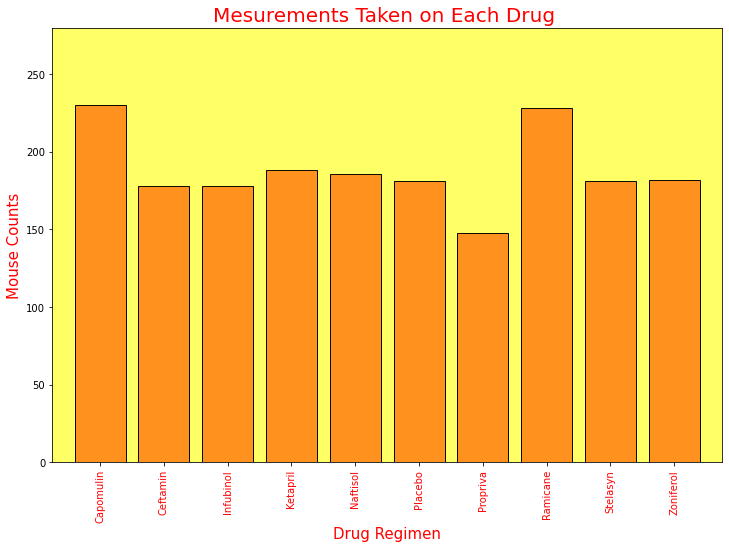

In [19]:
# Using .tolist() to convert series to list for the total number of measurements taken on each drug regimen.
mouse_counts = (new_clean_df.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()

#Create an array that contains drug_list for each mouse_count
x_axis = np.arange(len(drug_df))


# Plot bar graph
plt.rcParams['axes.facecolor'] = '#ffff66'
plt.figure(figsize=(12,8))
plt.bar(x_axis,mouse_counts, color='#ff8c1a', alpha=0.95, align="center", edgecolor="k")


# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Ramicane',
                          'Stelasyn','Zoniferol'],rotation='vertical',color="r",size=10)


# Set the limits of the x and y axis 
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(mouse_counts)+50)


# Set title and x and y lables
plt.title("Mesurements Taken on Each Drug ",fontsize=20, color="r")
plt.ylabel("Mouse Counts",fontsize=15, color="r" )
plt.xlabel("Drug Regimen",fontsize=15, color="r")

In [20]:
# Group by gender  
gender_data = new_clean_df.groupby(['Mouse ID','Sex'])
gender_data = pd.DataFrame(gender_data.size())

# Create the data frame with total count of male and female counts
gender_df = pd.DataFrame(gender_data.groupby(['Sex']).count())
gender_df.columns = ["Total Count"]
gender_df

,Total Count
Sex,
Female,123
Male,125


(-1.1877230750926049,
 1.111197451260921,
 -1.1963304488776791,
 1.1123702248046798)

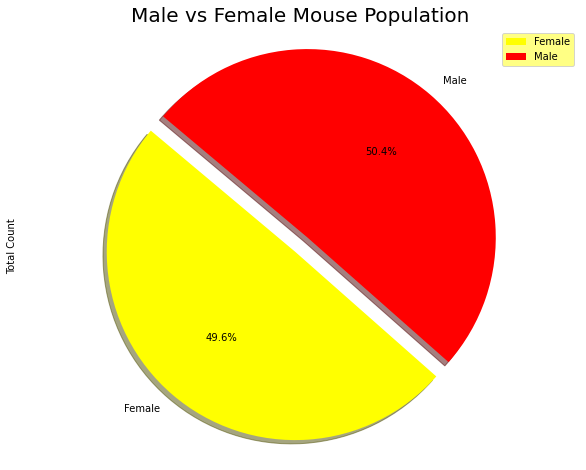

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ['yellow', 'red']
explode = (0.1, 0)
gender_df.plot.pie(y='Total Count',figsize=(10,8), colors = colors, startangle=140, explode = explode, 
                   shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.axis("equal")

Text(0.5, 1.0, 'Male vs Female Mouse Population')

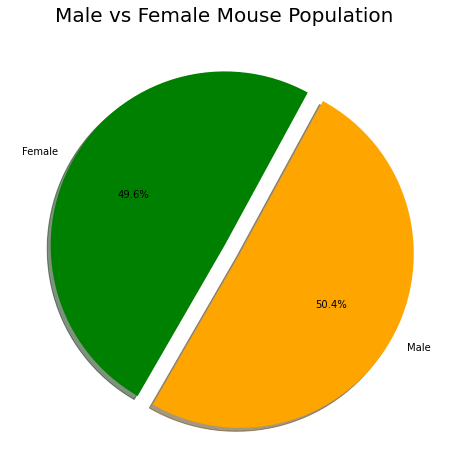

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_count = new_clean_df [new_clean_df["Sex"]== "Male"]["Mouse ID"].nunique()
female_count = new_clean_df [new_clean_df["Sex"]== "Female"]["Mouse ID"].nunique()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [male_count, female_count]

# The colors of each section of the pie chart
colors = ["orange", "Green"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.subplots(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.title('Male vs Female Mouse Population',fontsize = 20)


## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = combined_mouse_data.groupby("Mouse ID").max().reset_index()
 
   
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = max_tumor[["Mouse ID","Timepoint"]].merge(combined_mouse_data, on=["Mouse ID","Timepoint"], how="left")


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_data = merge_df[merge_df["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    iqr = tumor_data.quantile(0.75) - tumor_data.quantile(0.25)
    lower_bound = tumor_data.quantile(0.25) - (1.5*iqr)
    upper_bound = tumor_data.quantile(0.75) + (1.5*iqr)
    tumor_data
    # add subset 
    tumor_vol_data.append(tumor_data)
    
    # Determine outliers using upper and lower bounds
    print(f"{drug} potential outliers: {tumor_data[(tumor_data<lower_bound)|(tumor_data>upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


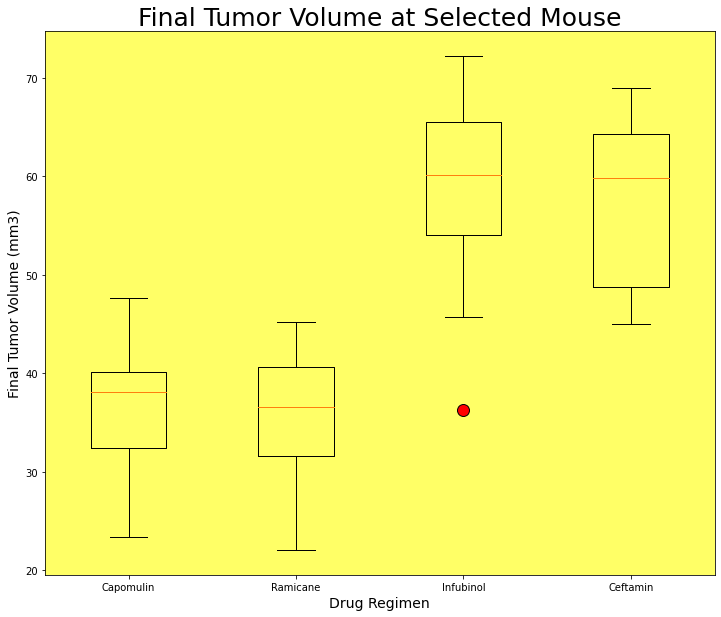

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(12, 10))
ax1.set_title('Final Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
plt.boxplot(tumor_vol_data, labels = drugs_list, flierprops={"markerfacecolor":"red","markersize":12})
plt.show()

## Line and Scatter Plots

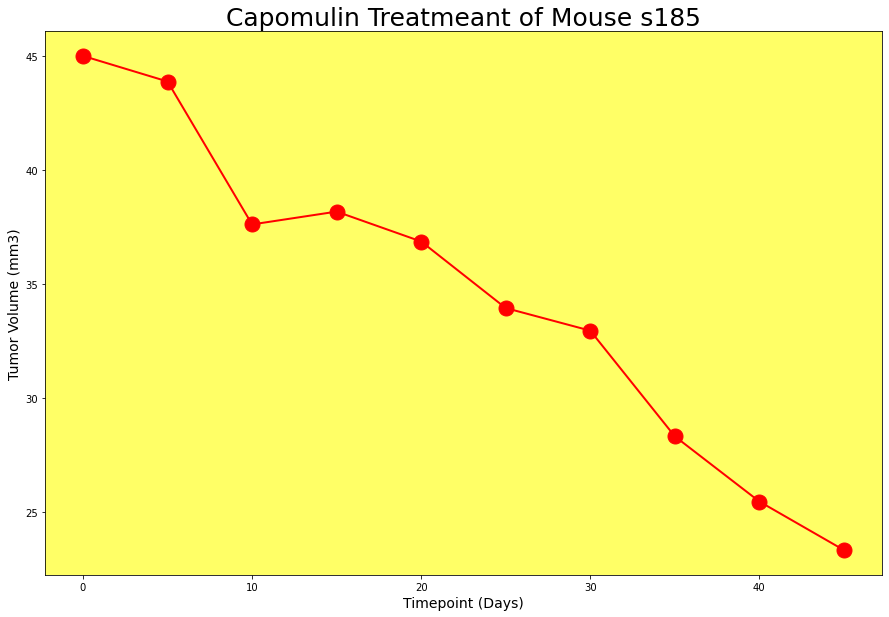

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin = new_clean_df[new_clean_df['Drug Regimen']=='Capomulin']   
 
# taking a muse for our lineplot
line_df = Capomulin.loc[Capomulin["Mouse ID"] == "s185",:]

x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin Treatmeant of Mouse s185',fontsize =25)
plt.plot(x_axis, tumor_size,linewidth=2, markersize=15,marker="o",color="red")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.show()

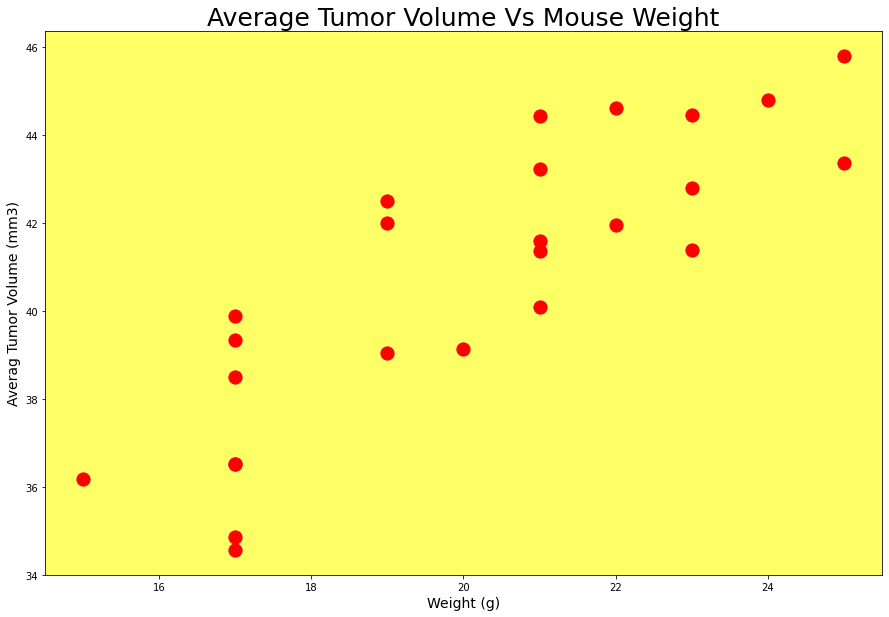

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin = new_clean_df[new_clean_df['Drug Regimen']=='Capomulin']  
fig1, ax1 = plt.subplots(figsize=(15, 10))
avg_Capomulin_vol = Capomulin.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(avg_Capomulin_vol['Weight (g)'],avg_Capomulin_vol['Tumor Volume (mm3)'],s=175, color="red")
plt.title('Average Tumor Volume Vs Mouse Weight',fontsize =25)
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =14)
plt.show()

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(avg_Capomulin_vol['Weight (g)'],avg_Capomulin_vol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [29]:
x_values = avg_Capomulin_vol['Weight (g)']
y_values = avg_Capomulin_vol['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241045
intercept:21.552160532685015
rvalue (Correlation coefficient):0.8419363424694718
pandas (Correlation coefficient):0.84
stderr:0.1275435903320134
y = 0.95x + 21.55


The r-squared is: 0.7088568047708717


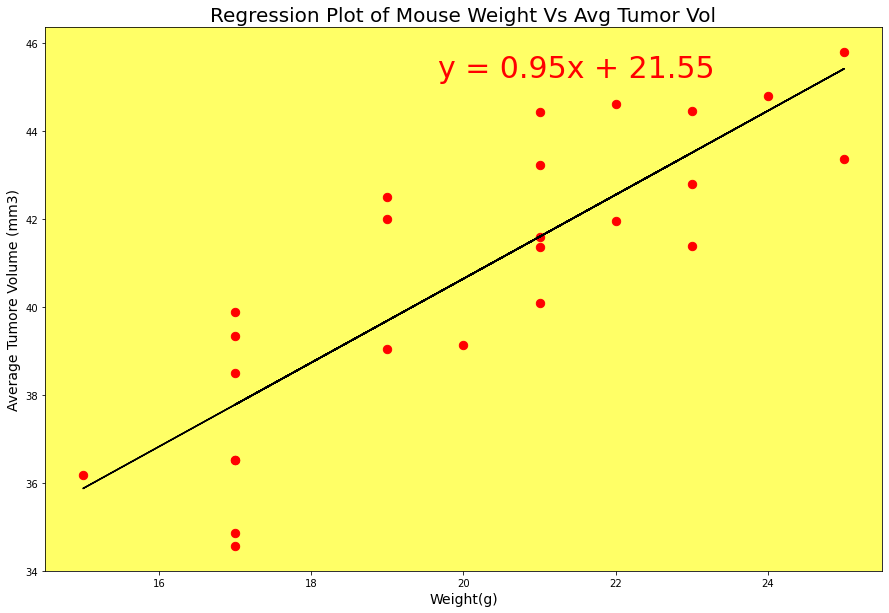

In [30]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=70, color="red")
plt.plot(x_values,regress_values,"k-")
plt.title('Regression Plot of Mouse Weight Vs Avg Tumor Vol',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), 
             textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")


plt.show()